In [3]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import  StandardScaler
from sklearn.decomposition import  PCA

url = "pca_iris.data"
df = pd.read_csv(url,names=['sepal_length','sepal_width','petal_length','petal_width','target'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
features = ['sepal_length','sepal_width','petal_length','petal_width']
x = df[features]
y = df[['target']]

#features veriler için standardizasyon işlemi uygulayalım
x = StandardScaler().fit_transform(x)


In [8]:
#orjinal verilerimiz 4 boyuta sahip ancak biz bunları PCA ile 2 boyuta indirgeyeceğiz
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents,columns=['pc1','pc2'])
principalDf

,pc1,pc2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


In [10]:
final_df = pd.concat([principalDf,df[['target']]],axis=1)
final_df.head()

,pc1,pc2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


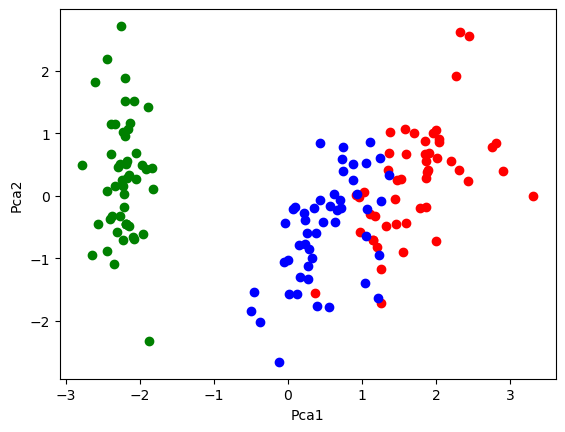

In [13]:
#son dataframe nesnesini görselleştirelim
df_setosa = final_df[df.target == 'Iris-setosa']
df_virginica = final_df[df.target == 'Iris-virginica']
df_versicolor = final_df[df.target == 'Iris-versicolor']

plt.xlabel("Pca1")
plt.ylabel("Pca2")

plt.scatter(df_setosa["pc1"],df_setosa["pc2"],color='green')
plt.scatter(df_virginica["pc1"],df_virginica["pc2"],color='red')
plt.scatter(df_versicolor["pc1"],df_versicolor["pc2"],color='blue')

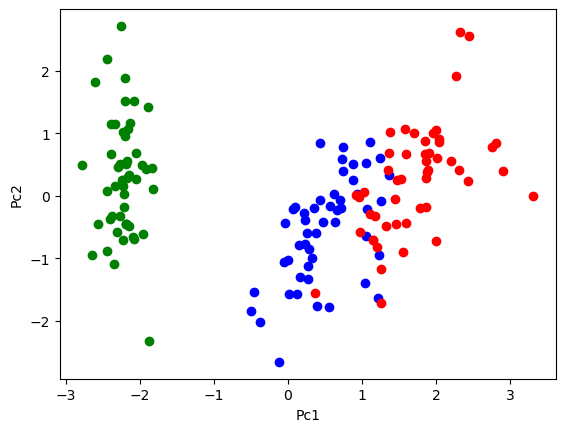

In [16]:
#daha profesyonel bir plotting yapalım (yeni çizim)
targets = ['Iris-setosa','Iris-versicolor','Iris-virginica']
colors = ['green','blue','red']

plt.xlabel("Pc1")
plt.ylabel("Pc2")

for target, col in zip(targets,colors):
    df_temp = final_df[df.target == target]
    plt.scatter(df_temp["pc1"],df_temp["pc2"],color=col)


In [18]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [19]:
pca.explained_variance_ratio_.sum()

0.9580097536148198